### **Loading and Previewing Data**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Response data All.csv')
df.head(10)

,Serial No.,Question,Human Answer,OpenAI Chatgpt Answer,Google Gemini Answer,Microsoft Copilot Answer,Claude Answer,Perplexity Answer
0,1,"For our interview, our first question will be ...","So emotional intelligence, not just from a ban...",Emotional intelligence (EI) is essential in ba...,"Emotions play a pivotal role in banking, espec...",Emotional intelligence plays a pivotal role in...,Emotions play a critical role in banking and f...,"Emotions play a critical role in banking, infl..."
1,2,"according to you, as to your vast experience i...","I think, of course, see, there are quite a lo...",A skill that AI can never replace is empathy —...,"While AI has made significant strides, one ski...",One skill that AI cannot replace is strategic ...,"I apologize, but I do not actually have any ex...",From my extensive experience in engineering ma...
2,3,What AI can do? What are the potential of AI i...,"So AI can be a very good partner, in whatever ...","AI has tremendous potential in engineering, es...",AI has the potential to revolutionize the fiel...,AI's potential in engineering is vast and tran...,AI has immense potential to revolutionize the ...,AI is revolutionizing the engineering sector b...
3,4,"As far as I've heard about AI, in 10 to 20 yea...",Immortal. There are some theories that AI can ...,"The idea that AI could ""help humans be immorta...",The statement that AI can help humans achieve ...,The statement that AI will help humans be immo...,That's an interesting perspective on the futur...,"The assertion that ""AI will help humans be imm..."
4,5,is engineering dead compared to marketing? Or ...,I feel it's like comparing apples and oranges....,Engineering is far from dead; it’s foundationa...,Both engineering and marketing are valuable fi...,Both engineering and marketing are dynamic and...,That's an interesting question comparing the p...,"The notion that engineering is ""dead"" compared..."
5,6,"Sir, as a director of engineering field. What ...",Creativity we need in everything. Even when yo...,"As a director in the engineering field, I beli...",Creativity and AI are two sides of the same co...,Creativity and AI are increasingly intertwined...,Creativity and AI is a fascinating and rapidly...,Creativity is an essential driver of innovatio...
6,7,"AI will be creative and if you dont use ai , y...","If you ever use generative AI model, it will s...",I think AI is undeniably transforming industri...,While AI has made significant strides in gener...,AI is indeed becoming a vital tool in many fie...,The notion that AI will make human creativity ...,AI is indeed becoming a crucial component in v...
7,8,"After AI, the only thing in the world that wil...",it is the matter of skill. That who is more c...,"Yes, I believe creativity will always be a hig...",Creativity will undoubtedly be a valuable asse...,"Creativity will always be highly valued, espec...",The idea that the only thing that will remain ...,Absolutely. As AI takes over more routine task...
8,9,"So, can you tell us at what extent right now c...","See, job quality will be enhanced. See, now on...",Corporates are increasingly using AI for a wid...,Corporations are increasingly adopting AI to s...,Corporations are increasingly integrating AI i...,"At Autodesk, we are actively exploring and imp...",Corporations are increasingly integrating AI i...
9,10,What will be the cyber net in the future? what...,"\r\n See, I am not a cyber expert. see cyber i...",The future of the cyber net will be highly int...,The future of the cyber landscape is both exci...,The future of cybersecurity with AI will be ma...,The future of cyberspace and cybersecurity in...,The future of cyberspace will likely be charac...


In [ ]:
df.columns

Index(['Serial No.', 'Question', 'Human Answer', 'OpenAI Chatgpt Answer',
       'Google Gemini Answer', 'Microsoft Copilot Answer', 'Claude Answer',
       'Perplexity Answer'],
      dtype='object')

### **Initial Data Exploration and Cleaning**

**Check for missing values**

In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)
df.info()


Missing values in each column:
 Serial No.                  0
Question                    0
Human Answer                0
OpenAI Chatgpt Answer       0
Google Gemini Answer        0
Microsoft Copilot Answer    0
Claude Answer               0
Perplexity Answer           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Serial No.                43 non-null     int64 
 1   Question                  43 non-null     object
 2   Human Answer              43 non-null     object
 3   OpenAI Chatgpt Answer     43 non-null     object
 4   Google Gemini Answer      43 non-null     object
 5   Microsoft Copilot Answer  43 non-null     object
 6   Claude Answer             43 non-null     object
 7   Perplexity Answer         43 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.8+ KB


### **Basic Descriptive Statistics and Preview**

**Raw Length of Responses**

Average Raw Length of Responses by Source (Text Output):
 Human         1072.767442
Chatgpt        669.930233
Gemini         523.255814
Copilot        494.325581
Claude         725.697674
Perplexity     594.116279


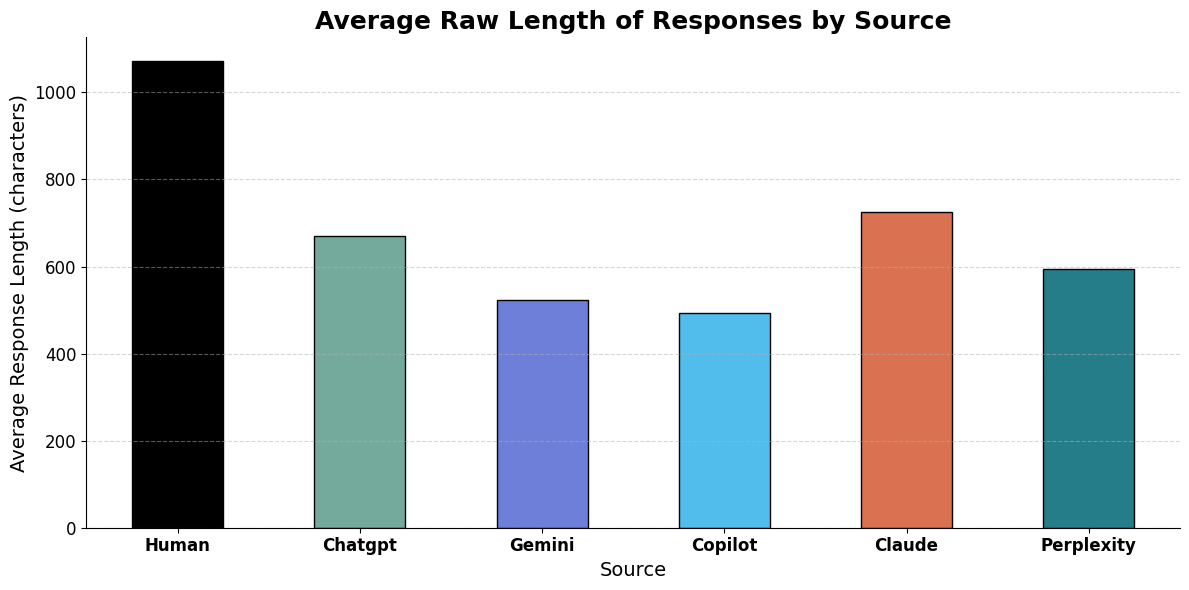

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df['Human_Length_Raw'] = df['Human Answer'].apply(len)
df['ChatGPT_Length_Raw'] = df['OpenAI Chatgpt Answer'].apply(len)
df['Gemini_Length_Raw'] = df['Google Gemini Answer'].apply(len)
df['Copilot_Length_Raw'] = df['Microsoft Copilot Answer'].apply(len)
df['Claude_Length_Raw'] = df['Claude Answer'].apply(len)
df['Perplexity_Length_Raw'] = df['Perplexity Answer'].apply(len)

avg_raw_lengths = df[['Human_Length_Raw', 'ChatGPT_Length_Raw', 'Gemini_Length_Raw',
                      'Copilot_Length_Raw', 'Claude_Length_Raw', 'Perplexity_Length_Raw']].mean()

custom_labels = {
    'Human_Length_Raw': 'Human',
    'ChatGPT_Length_Raw': 'Chatgpt',
    'Gemini_Length_Raw': 'Gemini',
    'Copilot_Length_Raw': 'Copilot',
    'Claude_Length_Raw': 'Claude',
    'Perplexity_Length_Raw': 'Perplexity'
}

avg_raw_lengths.index = avg_raw_lengths.index.map(custom_labels)

lengths_raw_text = avg_raw_lengths.to_string()
print("Average Raw Length of Responses by Source (Text Output):\n", lengths_raw_text)

with open("average_raw_lengths_output.txt", "w") as file:
    file.write("Average Raw Length of Responses by Source:\n" + lengths_raw_text)

colors = ['#000000', '#74aa9c', '#6e7fd9', '#51bded', '#da7251', '#257d89']
plt.figure(figsize=(12, 6))
avg_raw_lengths.plot(kind='bar', color=colors, edgecolor='black', linewidth=1)
plt.title('Average Raw Length of Responses by Source', fontsize=18, fontweight='bold')
plt.ylabel('Average Response Length (characters)', fontsize=14)
plt.xlabel('Source', fontsize=14)

plt.xticks(rotation=0, fontsize=12,fontweight='bold')
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()

plt.tight_layout()
plt.show()


<ipython-input-8-60f3b2175661>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Source', y='Response Length', data=lengths_melted,


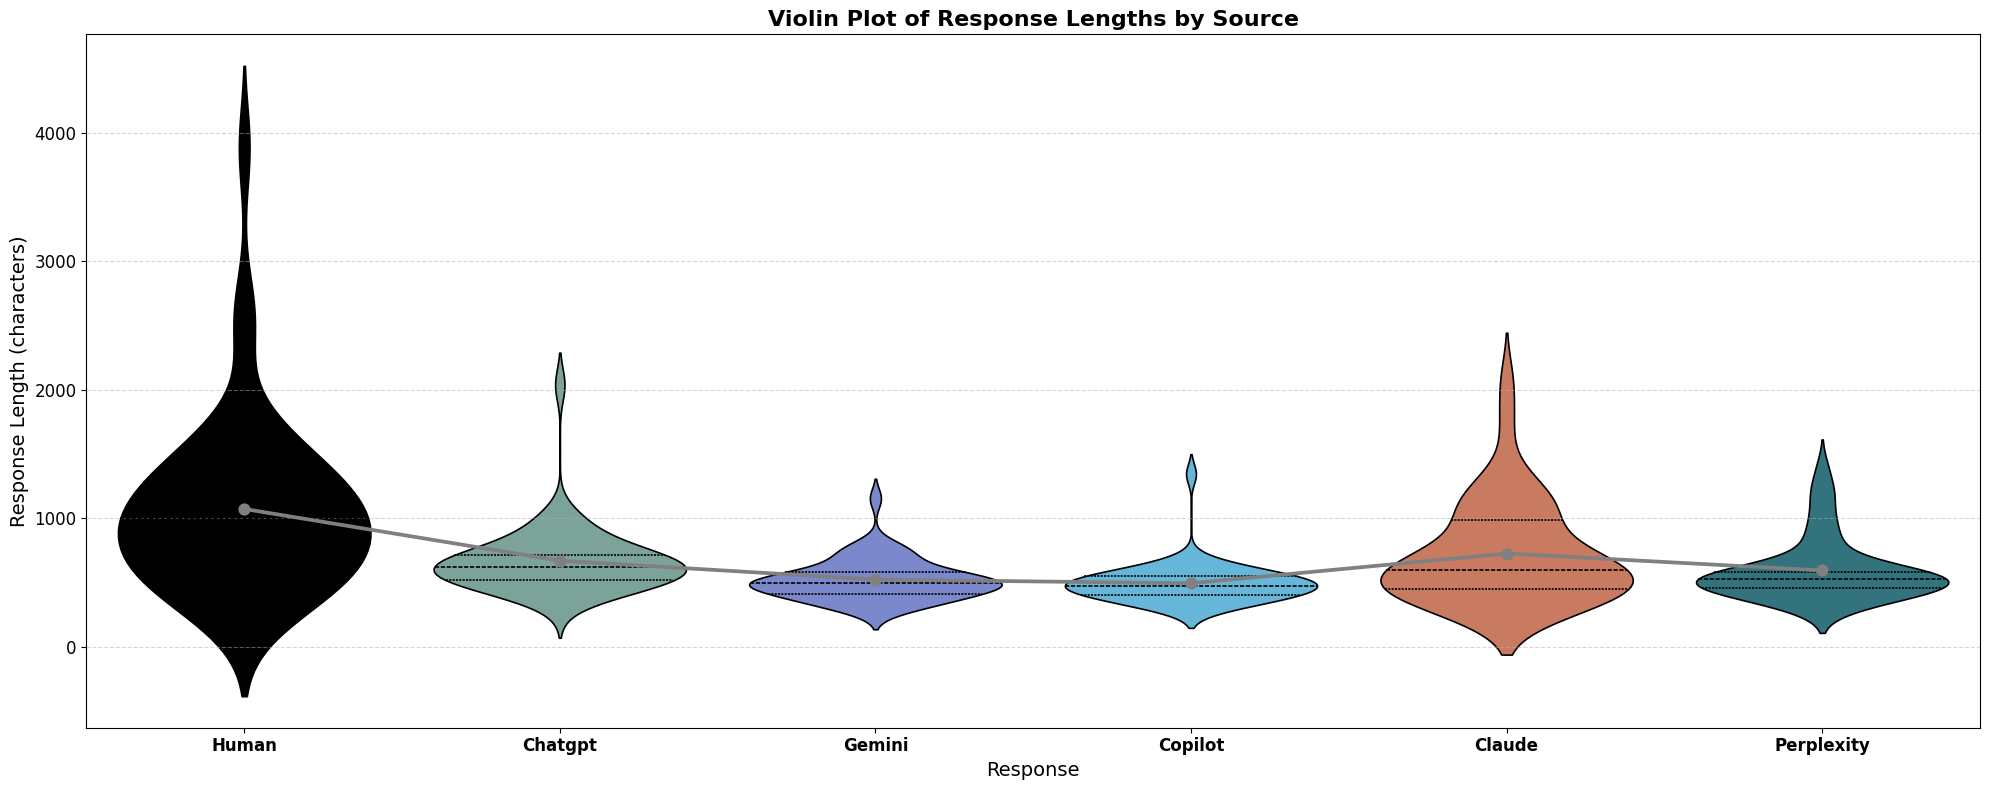

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preparing the data in a long-form format
lengths_melted = df.melt(value_vars=['Human_Length_Raw', 'ChatGPT_Length_Raw',
                                     'Gemini_Length_Raw', 'Copilot_Length_Raw',
                                     'Claude_Length_Raw', 'Perplexity_Length_Raw'],
                         var_name='Source', value_name='Response Length')

# Mapping custom x-axis labels
custom_labels = {
    'Human_Length_Raw': 'Human',
    'ChatGPT_Length_Raw': 'Chatgpt',
    'Gemini_Length_Raw': 'Gemini',
    'Copilot_Length_Raw': 'Copilot',
    'Claude_Length_Raw': 'Claude',
    'Perplexity_Length_Raw': 'Perplexity'
}

# Replace the values in the 'Source' column with custom labels
lengths_melted['Source'] = lengths_melted['Source'].map(custom_labels)

# Updated color palette matching custom labels
color_palette = {
    'Human': 'black',
    'Chatgpt': '#74aa9c',
    'Gemini': '#6e7fd9',
    'Copilot': '#51bded',
    'Claude': '#da7251',
    'Perplexity': '#257d89'
}

# Setting a larger plot size for better visibility
plt.figure(figsize=(20, 8))

# Creating the violin plot with custom colors
sns.violinplot(x='Source', y='Response Length', data=lengths_melted,
               palette=color_palette, inner='quartile', linewidth=1.2)

# Adding mean points with `errorbar=None`
sns.pointplot(x='Source', y='Response Length', data=lengths_melted,
              estimator='mean', color='gray', markers='o', linestyles='-', errorbar=None)

# Adding titles and labels
plt.title('Violin Plot of Response Lengths by Source', fontsize=16, fontweight='bold')
plt.xlabel('Response', fontsize=14)
plt.ylabel('Response Length (characters)', fontsize=14)
plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.tight_layout()  # Ensures everything fits within the plot area
plt.show()


## **Preprocessing**

### **Installing required libraries**
NLTK (Natural Language Toolkit) for text processing, spaCy for tokenization and lemmatization, and download the spaCy language model.

In [ ]:
!pip install nltk spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 84.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### **Text Cleaning**
Cleaning the text by removing URLs, non-alphanumeric characters, and unnecessary white spaces.

In [ ]:
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove non-alphanumeric characters (except spaces)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Example cleaning text
example_text = "Visit https://example.com for more details! It's really great."
cleaned_text = clean_text(example_text)
cleaned_text


'Visit for more details Its really great'

### **Tokenization**
Breaking the text into words using spaCy and NLTK. We'll use NLTK for tokenization since it's simple for basic tasks.

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
def tokenize_text(text):
    # Tokenize the text using NLTK
    tokens = word_tokenize(text)
    return tokens

# Example of tokenizing cleaned text
tokens = tokenize_text(cleaned_text)
tokens


['Visit', 'for', 'more', 'details', 'Its', 'really', 'great']

### **Normalization**
Converting all tokens to lowercase for consistency.

In [ ]:
def normalize_text(tokens):
    # Convert tokens to lowercase
    tokens = [token.lower() for token in tokens]
    return tokens

normalized_tokens = normalize_text(tokens)
normalized_tokens


['visit', 'for', 'more', 'details', 'its', 'really', 'great']

### **Stopword Removal**
Removing common words (stopwords) that do not add value to our analysis.



In [ ]:
def remove_stopwords(tokens):
    # Load NLTK's stopwords
    stop_words = set(stopwords.words('english'))
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

filtered_tokens = remove_stopwords(normalized_tokens)
filtered_tokens


['visit', 'details', 'really', 'great']

### **Lemmatization**
Reducing the words to their base form using spaCy’s lemmatizer.

In [ ]:
def lemmatize_tokens(tokens):
    # Lemmatize tokens using spaCy
    doc = nlp(" ".join(tokens))
    lemmatized_tokens = [token.lemma_ for token in doc]
    return lemmatized_tokens

lemmatized_tokens = lemmatize_tokens(filtered_tokens)
lemmatized_tokens


['visit', 'detail', 'really', 'great']

### **Applying Preprocessing to Text Columns**

In [ ]:
import pandas as pd

# Load the CSV data (Replace 'your_file.csv' with your actual file path or URL)
df = pd.read_csv('/content/Response data All.csv')


In [ ]:
# Clean text function
df['Clean_Human_Answer'] = df['Human Answer'].apply(clean_text)
df['Clean_ChatGPT_Answer'] = df['OpenAI Chatgpt Answer'].apply(clean_text)
df['Clean_Gemini_Answer'] = df['Google Gemini Answer'].apply(clean_text)
df['Clean_Copilot_Answer'] = df['Microsoft Copilot Answer'].apply(clean_text)
df['Clean_Claude_Answer'] = df['Claude Answer'].apply(clean_text)
df['Clean_Perplexity_Answer'] = df['Perplexity Answer'].apply(clean_text)

# Tokenize text
df['Tokenized_Human_Answer'] = df['Clean_Human_Answer'].apply(tokenize_text)
df['Tokenized_ChatGPT_Answer'] = df['Clean_ChatGPT_Answer'].apply(tokenize_text)
df['Tokenized_Gemini_Answer'] = df['Clean_Gemini_Answer'].apply(tokenize_text)
df['Tokenized_Copilot_Answer'] = df['Clean_Copilot_Answer'].apply(tokenize_text)
df['Tokenized_Claude_Answer'] = df['Clean_Claude_Answer'].apply(tokenize_text)
df['Tokenized_Perplexity_Answer'] = df['Clean_Perplexity_Answer'].apply(tokenize_text)

# Normalize (Lowercase)
df['Normalized_Human_Answer'] = df['Tokenized_Human_Answer'].apply(normalize_text)
df['Normalized_ChatGPT_Answer'] = df['Tokenized_ChatGPT_Answer'].apply(normalize_text)
df['Normalized_Gemini_Answer'] = df['Tokenized_Gemini_Answer'].apply(normalize_text)
df['Normalized_Copilot_Answer'] = df['Tokenized_Copilot_Answer'].apply(normalize_text)
df['Normalized_Claude_Answer'] = df['Tokenized_Claude_Answer'].apply(normalize_text)
df['Normalized_Perplexity_Answer'] = df['Tokenized_Perplexity_Answer'].apply(normalize_text)

# Remove stopwords
df['Filtered_Human_Answer'] = df['Normalized_Human_Answer'].apply(remove_stopwords)
df['Filtered_ChatGPT_Answer'] = df['Normalized_ChatGPT_Answer'].apply(remove_stopwords)
df['Filtered_Gemini_Answer'] = df['Normalized_Gemini_Answer'].apply(remove_stopwords)
df['Filtered_Copilot_Answer'] = df['Normalized_Copilot_Answer'].apply(remove_stopwords)
df['Filtered_Claude_Answer'] = df['Normalized_Claude_Answer'].apply(remove_stopwords)
df['Filtered_Perplexity_Answer'] = df['Normalized_Perplexity_Answer'].apply(remove_stopwords)

# Lemmatize
df['Lemmatized_Human_Answer'] = df['Filtered_Human_Answer'].apply(lemmatize_tokens)
df['Lemmatized_ChatGPT_Answer'] = df['Filtered_ChatGPT_Answer'].apply(lemmatize_tokens)
df['Lemmatized_Gemini_Answer'] = df['Filtered_Gemini_Answer'].apply(lemmatize_tokens)
df['Lemmatized_Copilot_Answer'] = df['Filtered_Copilot_Answer'].apply(lemmatize_tokens)
df['Lemmatized_Claude_Answer'] = df['Filtered_Claude_Answer'].apply(lemmatize_tokens)
df['Lemmatized_Perplexity_Answer'] = df['Filtered_Perplexity_Answer'].apply(lemmatize_tokens)

# Show the updated dataframe with the preprocessed text columns
df.head()


,Serial No.,Question,Human Answer,OpenAI Chatgpt Answer,Google Gemini Answer,Microsoft Copilot Answer,Claude Answer,Perplexity Answer,Clean_Human_Answer,Clean_ChatGPT_Answer,...,Filtered_Gemini_Answer,Filtered_Copilot_Answer,Filtered_Claude_Answer,Filtered_Perplexity_Answer,Lemmatized_Human_Answer,Lemmatized_ChatGPT_Answer,Lemmatized_Gemini_Answer,Lemmatized_Copilot_Answer,Lemmatized_Claude_Answer,Lemmatized_Perplexity_Answer
0,1,"For our interview, our first question will be ...","So emotional intelligence, not just from a ban...",Emotional intelligence (EI) is essential in ba...,"Emotions play a pivotal role in banking, espec...",Emotional intelligence plays a pivotal role in...,Emotions play a critical role in banking and f...,"Emotions play a critical role in banking, infl...",So emotional intelligence not just from a bank...,Emotional intelligence EI is essential in bank...,...,"[emotions, play, pivotal, role, banking, espec...","[emotional, intelligence, plays, pivotal, role...","[emotions, play, critical, role, banking, fina...","[emotions, play, critical, role, banking, infl...","[emotional, intelligence, banking, perspective...","[emotional, intelligence, ei, essential, banki...","[emotion, play, pivotal, role, bank, especiall...","[emotional, intelligence, play, pivotal, role,...","[emotion, play, critical, role, banking, finan...","[emotion, play, critical, role, banking, influ..."
1,2,"according to you, as to your vast experience i...","I think, of course, see, there are quite a lo...",A skill that AI can never replace is empathy —...,"While AI has made significant strides, one ski...",One skill that AI cannot replace is strategic ...,"I apologize, but I do not actually have any ex...",From my extensive experience in engineering ma...,I think of course see there are quite a lot No...,A skill that AI can never replace is empathy t...,...,"[ai, made, significant, strides, one, skill, r...","[one, skill, ai, replace, strategic, leadershi...","[apologize, actually, experience, engineering,...","[extensive, experience, engineering, managemen...","[think, course, see, quite, lot, one, emotiona...","[skill, ai, never, replace, empathy, ability, ...","[ai, make, significant, stride, one, skill, re...","[one, skill, ai, replace, strategic, leadershi...","[apologize, actually, experience, engineering,...","[extensive, experience, engineering, managemen..."
2,3,What AI can do? What are the potential of AI i...,"So AI can be a very good partner, in whatever ...","AI has tremendous potential in engineering, es...",AI has the potential to revolutionize the fiel...,AI's potential in engineering is vast and tran...,AI has immense potential to revolutionize the ...,AI is revolutionizing the engineering sector b...,So AI can be a very good partner in whatever w...,AI has tremendous potential in engineering esp...,...,"[ai, potential, revolutionize, field, engineer...","[ais, potential, engineering, vast, transforma...","[ai, immense, potential, revolutionize, engine...","[ai, revolutionizing, engineering, sector, enh...","[ai, good, partner, whatever, engineersright, ...","[ai, tremendous, potential, engineering, espec...","[ai, potential, revolutionize, field, engineer...","[ais, potential, engineering, vast, transforma...","[ai, immense, potential, revolutionize, engine...","[ai, revolutionize, engineering, sector, enhan..."
3,4,"As far as I've heard about AI, in 10 to 20 yea...",Immortal. There are some theories that AI can ...,"The idea that AI could ""help humans be immorta...",The statement that AI can help humans achieve ...,The statement that AI will help humans be immo...,That's an interesting perspective on the futur...,"The assertion that ""AI will help humans be imm...",Immortal There are some theories that AI can h...,The idea that AI could help humans be immortal...,...,"[statement, ai, help, humans, achieve, immorta...","[statement, ai, help, humans, immortal, philos...","[thats, interesting, perspective, future, ai, 

### **Length of Preprocessed Text(After Preprocessing)**

Avg Cleaned lengths of Responses by Source (Text Output):
 Human         95.627907
Chatgpt       62.395349
Gemini        48.139535
Copilot       45.860465
Claude        65.581395
Perplexity    54.441860


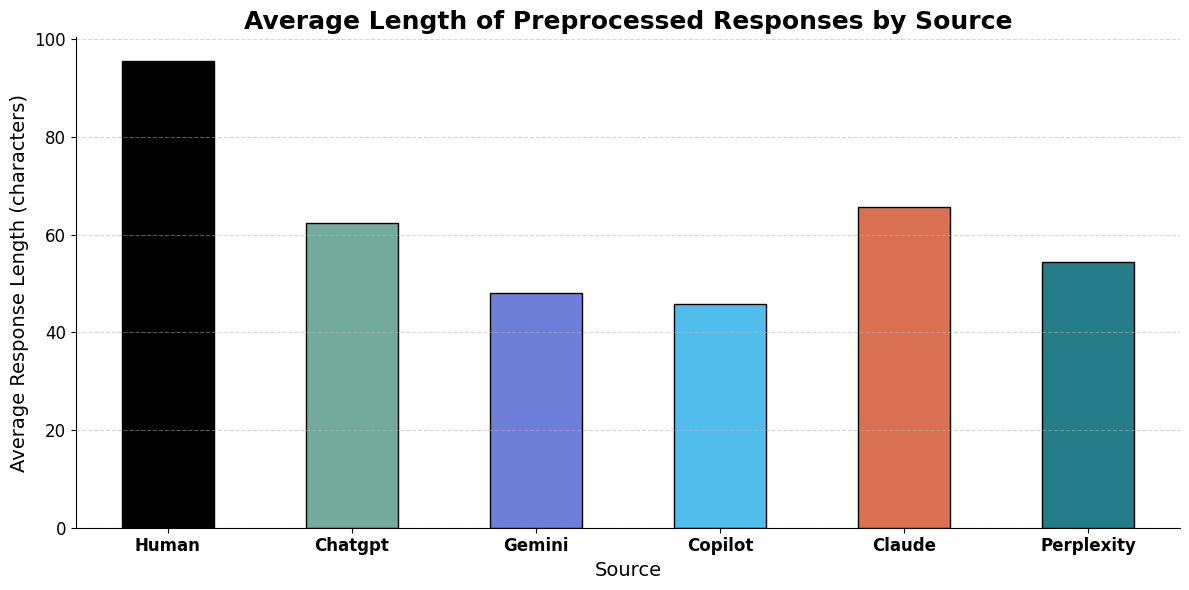

In [ ]:
# Calculate the length of the preprocessed responses
df['Human_Length_Cleaned'] = df['Lemmatized_Human_Answer'].apply(len)
df['ChatGPT_Length_Cleaned'] = df['Lemmatized_ChatGPT_Answer'].apply(len)
df['Gemini_Length_Cleaned'] = df['Lemmatized_Gemini_Answer'].apply(len)
df['Copilot_Length_Cleaned'] = df['Lemmatized_Copilot_Answer'].apply(len)
df['Claude_Length_Cleaned'] = df['Lemmatized_Claude_Answer'].apply(len)
df['Perplexity_Length_Cleaned'] = df['Lemmatized_Perplexity_Answer'].apply(len)

# Create a DataFrame to hold average lengths of cleaned responses
avg_cleaned_lengths = df[['Human_Length_Cleaned', 'ChatGPT_Length_Cleaned', 'Gemini_Length_Cleaned',
                          'Copilot_Length_Cleaned', 'Claude_Length_Cleaned', 'Perplexity_Length_Cleaned']].mean()

# Mapping custom x-axis labels as before
custom_labels = {
    'Human_Length_Cleaned': 'Human',
    'ChatGPT_Length_Cleaned': 'Chatgpt',
    'Gemini_Length_Cleaned': 'Gemini',
    'Copilot_Length_Cleaned': 'Copilot',
    'Claude_Length_Cleaned': 'Claude',
    'Perplexity_Length_Cleaned': 'Perplexity'
}

# Renaming indices in the average length series for custom labeling
avg_cleaned_lengths.index = avg_cleaned_lengths.index.map(custom_labels)

# Convert average lengths to a text-friendly output
lengths_cleaned_text = avg_cleaned_lengths.to_string()
print("Avg Cleaned lengths of Responses by Source (Text Output):\n", lengths_cleaned_text)

# Save the text output to a file for easy sharing
with open("avg_cleaned_lengths_output.txt", "w") as file:
    file.write("Average Cleaned Length of Responses by Source:\n" + lengths_cleaned_text)

# Define colors for each source with black for Human
colors = ['#000000', '#74aa9c', '#6e7fd9', '#51bded', '#da7251', '#257d89']

# Set plot style and create a bar chart for average cleaned lengths
plt.figure(figsize=(12, 6))
avg_cleaned_lengths.plot(kind='bar', color=colors, edgecolor='black', linewidth=1)

# Enhance plot title and labels
plt.title('Average Length of Preprocessed Responses by Source' ,fontsize=18, fontweight='bold')
plt.ylabel('Average Response Length (characters)', fontsize=14)
plt.xlabel('Source', fontsize=14)

# Customize ticks for better readability
plt.xticks(rotation=0, fontsize=12,fontweight='bold')
plt.yticks(fontsize=12)

# Add grid lines and style adjustments
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()

# Show the plot with tight layout for clarity
plt.tight_layout()
plt.show()


## **Natural Language Understanding (NLU) and Analysis**


---



Sentiment analysis is a technique in Natural Language Processing (NLP) that detects the emotional tone or attitude in a piece of text. It typically classifies text as positive, negative, or neutral, often with a numeric score to reflect the intensity of these sentiments.

### **Sentiment Analysis**


---

 The aim is to compare the sentiment of AI-generated answers with human responses, ideally to see how closely these AI answers match the sentiment expressed by real human experts.

**Install and Import of Required Libraries**

In [ ]:
# Install the necessary libraries
!pip install vaderSentiment
!pip install textblob

# Importing libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.2 MB/s eta 0:00:00


**Sentiment Analysis with VADER**


---

>Valence Aware Dictionary and Sentiment Reasoner

In [ ]:
# Initialize VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment using VADER
def get_vader_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']  # This returns the compound score

# Apply the function to each relevant column in the DataFrame
df['Human_Sentiment_Vader'] = df['Clean_Human_Answer'].apply(get_vader_sentiment)
df['ChatGPT_Sentiment_Vader'] = df['Clean_ChatGPT_Answer'].apply(get_vader_sentiment)
df['Gemini_Sentiment_Vader'] = df['Clean_Gemini_Answer'].apply(get_vader_sentiment)
df['Copilot_Sentiment_Vader'] = df['Clean_Copilot_Answer'].apply(get_vader_sentiment)
df['Claude_Sentiment_Vader'] = df['Clean_Claude_Answer'].apply(get_vader_sentiment)
df['Perplexity_Sentiment_Vader'] = df['Clean_Perplexity_Answer'].apply(get_vader_sentiment)

# Display the sentiment results
df[['Human_Sentiment_Vader', 'ChatGPT_Sentiment_Vader', 'Gemini_Sentiment_Vader',
    'Copilot_Sentiment_Vader', 'Claude_Sentiment_Vader', 'Perplexity_Sentiment_Vader']].head()


,Human_Sentiment_Vader,ChatGPT_Sentiment_Vader,Gemini_Sentiment_Vader,Copilot_Sentiment_Vader,Claude_Sentiment_Vader,Perplexity_Sentiment_Vader
0,0.9514,0.9275,0.9231,0.7843,0.9830,0.9662
1,0.9933,0.8826,0.1027,0.9726,0.9900,0.9864
2,0.9501,0.6808,0.9307,0.8646,0.9787,0.9818
3,0.2258,0.9872,-0.3190,0.0772,0.9954,0.9696
4,0.9960,0.9760,0.9661,0.9944,0.9847,0.9270


**Sentiment Analysis with TextBlob**


---


>**VADER** is generally more tailored for **social media-like** text, **TextBlob** uses a simpler approach for **polarity and subjectivity analysis**.

In [ ]:
# Function to calculate sentiment using TextBlob
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Polarity ranges from -1 to 1

# Apply TextBlob sentiment to each relevant column
df['Human_Sentiment_TextBlob'] = df['Clean_Human_Answer'].apply(get_textblob_sentiment)
df['ChatGPT_Sentiment_TextBlob'] = df['Clean_ChatGPT_Answer'].apply(get_textblob_sentiment)
df['Gemini_Sentiment_TextBlob'] = df['Clean_Gemini_Answer'].apply(get_textblob_sentiment)
df['Copilot_Sentiment_TextBlob'] = df['Clean_Copilot_Answer'].apply(get_textblob_sentiment)
df['Claude_Sentiment_TextBlob'] = df['Clean_Claude_Answer'].apply(get_textblob_sentiment)
df['Perplexity_Sentiment_TextBlob'] = df['Clean_Perplexity_Answer'].apply(get_textblob_sentiment)

# Display the TextBlob sentiment results
df[['Human_Sentiment_TextBlob', 'ChatGPT_Sentiment_TextBlob', 'Gemini_Sentiment_TextBlob',
    'Copilot_Sentiment_TextBlob', 'Claude_Sentiment_TextBlob', 'Perplexity_Sentiment_TextBlob']].head()


,Human_Sentiment_TextBlob,ChatGPT_Sentiment_TextBlob,Gemini_Sentiment_TextBlob,Copilot_Sentiment_TextBlob,Claude_Sentiment_TextBlob,Perplexity_Sentiment_TextBlob
0,0.126209,0.148389,0.159091,0.091667,0.137681,0.083117
1,0.190421,0.116667,0.119444,-0.042857,0.093831,0.105361
2,0.273720,0.036905,0.183333,0.072222,0.205758,0.072768
3,0.018636,0.141017,0.000000,0.071429,0.040064,0.132407
4,0.174830,0.160938,0.147768,0.179236,0.117019,0.152597


**Sentiment Visualization**


---



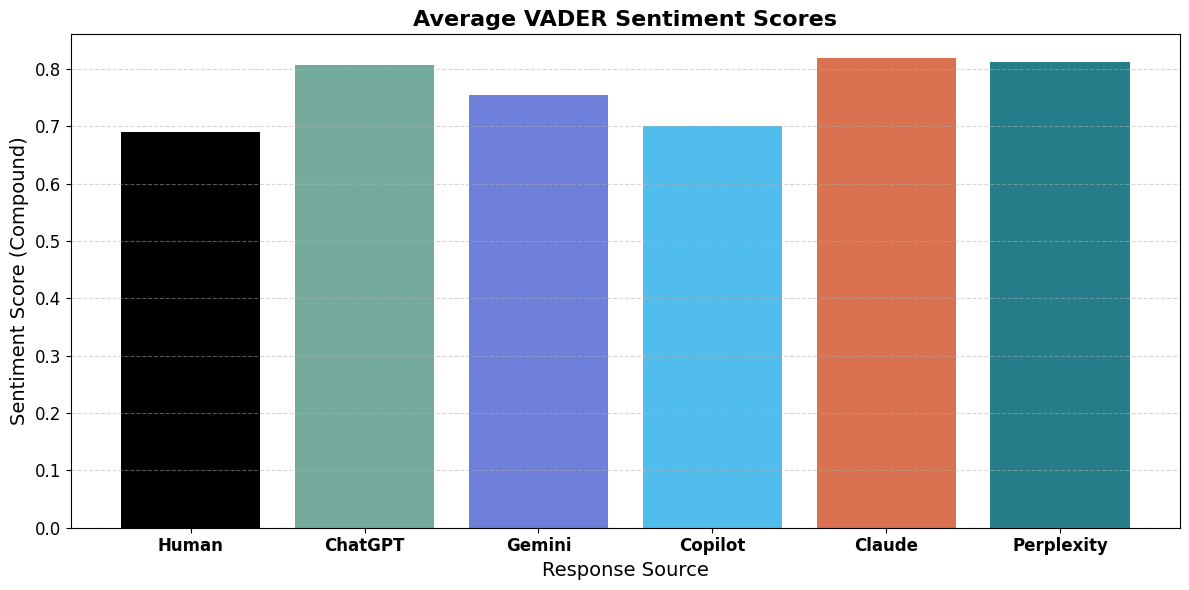

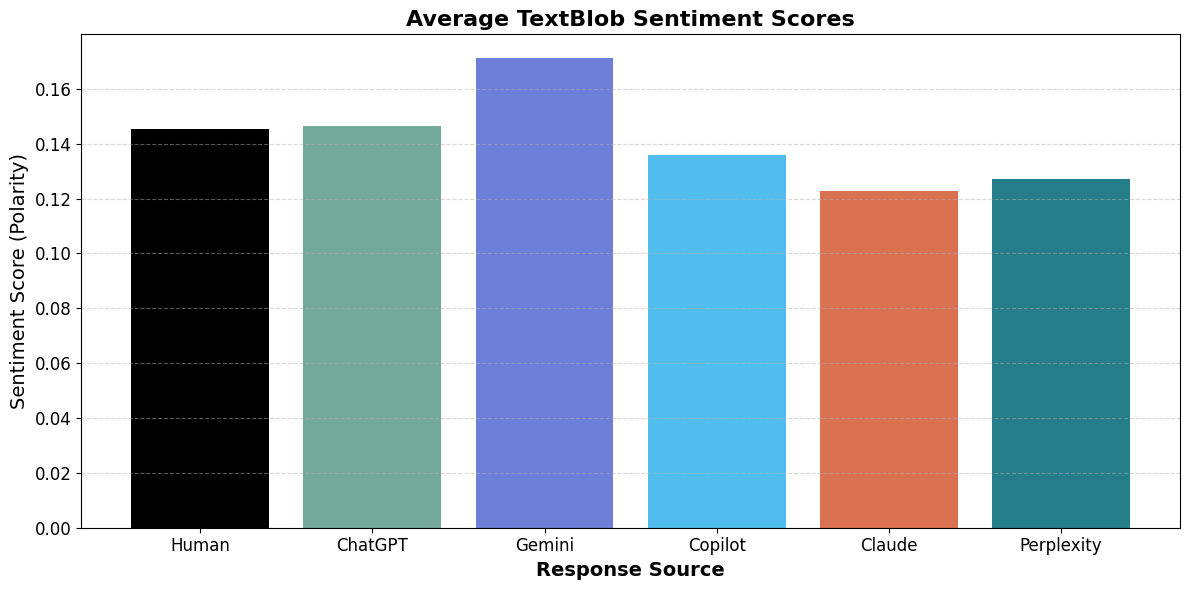

In [ ]:
import matplotlib.pyplot as plt

# Colors for each source (Human in black and others with the given color palette)
colors = ['black', '#74aa9c', '#6e7fd9', '#51bded', '#da7251', '#257d89']
labels = ['Human', 'ChatGPT', 'Gemini', 'Copilot', 'Claude', 'Perplexity']  # Custom labels for x-axis

# Visualize VADER sentiment scores
vader_sentiments = ['Human_Sentiment_Vader', 'ChatGPT_Sentiment_Vader', 'Gemini_Sentiment_Vader',
                    'Copilot_Sentiment_Vader', 'Claude_Sentiment_Vader', 'Perplexity_Sentiment_Vader']

# Plotting VADER sentiment scores
plt.figure(figsize=(12, 6))
plt.bar(labels, df[vader_sentiments].mean(), color=colors)
plt.title('Average VADER Sentiment Scores', fontsize=16, fontweight='bold')
plt.ylabel('Sentiment Score (Compound)', fontsize=14)
plt.xlabel('Response Source', fontsize=14)
plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Visualize TextBlob sentiment scores
textblob_sentiments = ['Human_Sentiment_TextBlob', 'ChatGPT_Sentiment_TextBlob', 'Gemini_Sentiment_TextBlob',
                       'Copilot_Sentiment_TextBlob', 'Claude_Sentiment_TextBlob', 'Perplexity_Sentiment_TextBlob']

# Plotting TextBlob sentiment scores
plt.figure(figsize=(12, 6))
plt.bar(labels, df[textblob_sentiments].mean(), color=colors)
plt.title('Average TextBlob Sentiment Scores', fontsize=16, fontweight='bold')
plt.ylabel('Sentiment Score (Polarity)', fontsize=14)
plt.xlabel('Response Source', fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Save sentiment results
sentiment_columns = ['Serial No.', 'Human_Sentiment_Vader', 'ChatGPT_Sentiment_Vader', 'Gemini_Sentiment_Vader',
                     'Copilot_Sentiment_Vader', 'Claude_Sentiment_Vader', 'Perplexity_Sentiment_Vader',
                     'Human_Sentiment_TextBlob', 'ChatGPT_Sentiment_TextBlob', 'Gemini_Sentiment_TextBlob',
                     'Copilot_Sentiment_TextBlob', 'Claude_Sentiment_TextBlob', 'Perplexity_Sentiment_TextBlob']

df[sentiment_columns].to_csv('sentiment_analysis_results.csv', index=False)


**Average sentiments**

---



In [ ]:
# Calculate and print the average sentiment scores for each source using VADER
vader_sentiments = {
    'Human': df['Human_Sentiment_Vader'].mean(),
    'ChatGPT': df['ChatGPT_Sentiment_Vader'].mean(),
    'Gemini': df['Gemini_Sentiment_Vader'].mean(),
    'Copilot': df['Copilot_Sentiment_Vader'].mean(),
    'Claude': df['Claude_Sentiment_Vader'].mean(),
    'Perplexity': df['Perplexity_Sentiment_Vader'].mean()
}
vader_sentiment_text = '\n'.join([f"{source}_Sentiment_VADER: {score:.4f}" for source, score in vader_sentiments.items()])
print("Average VADER Sentiment Scores by Source (Text Output):\n", vader_sentiment_text)

# Calculate and print the average sentiment scores for each source using TextBlob
textblob_sentiments = {
    'Human': df['Human_Sentiment_TextBlob'].mean(),
    'ChatGPT': df['ChatGPT_Sentiment_TextBlob'].mean(),
    'Gemini': df['Gemini_Sentiment_TextBlob'].mean(),
    'Copilot': df['Copilot_Sentiment_TextBlob'].mean(),
    'Claude': df['Claude_Sentiment_TextBlob'].mean(),
    'Perplexity': df['Perplexity_Sentiment_TextBlob'].mean()
}
textblob_sentiment_text = '\n'.join([f"{source}_Sentiment_TextBlob: {score:.4f}" for source, score in textblob_sentiments.items()])
print("Average TextBlob Sentiment Scores by Source (Text Output):\n", textblob_sentiment_text)

# Optional: Save to text files for easier sharing or referencing
with open("vader_sentiment_scores.txt", "w") as file:
    file.write("Average VADER Sentiment Scores by Source:\n" + vader_sentiment_text)

with open("textblob_sentiment_scores.txt", "w") as file:
    file.write("Average TextBlob Sentiment Scores by Source:\n" + textblob_sentiment_text)


Average VADER Sentiment Scores by Source (Text Output):
 Human_Sentiment_VADER: 0.6899
ChatGPT_Sentiment_VADER: 0.8080
Gemini_Sentiment_VADER: 0.7543
Copilot_Sentiment_VADER: 0.7008
Claude_Sentiment_VADER: 0.8196
Perplexity_Sentiment_VADER: 0.8130
Average TextBlob Sentiment Scores by Source (Text Output):
 Human_Sentiment_TextBlob: 0.1455
ChatGPT_Sentiment_TextBlob: 0.1463
Gemini_Sentiment_TextBlob: 0.1713
Copilot_Sentiment_TextBlob: 0.1360
Claude_Sentiment_TextBlob: 0.1227
Perplexity_Sentiment_TextBlob: 0.1272


**Sentiment deviation from human responses**

In [ ]:
# Calculate combined sentiment score as the average of VADER and TextBlob scores for each response source
df['Human_Combined_Sentiment'] = (df['Human_Sentiment_Vader'] + df['Human_Sentiment_TextBlob']) / 2
df['ChatGPT_Combined_Sentiment'] = (df['ChatGPT_Sentiment_Vader'] + df['ChatGPT_Sentiment_TextBlob']) / 2
df['Gemini_Combined_Sentiment'] = (df['Gemini_Sentiment_Vader'] + df['Gemini_Sentiment_TextBlob']) / 2
df['Copilot_Combined_Sentiment'] = (df['Copilot_Sentiment_Vader'] + df['Copilot_Sentiment_TextBlob']) / 2
df['Claude_Combined_Sentiment'] = (df['Claude_Sentiment_Vader'] + df['Claude_Sentiment_TextBlob']) / 2
df['Perplexity_Combined_Sentiment'] = (df['Perplexity_Sentiment_Vader'] + df['Perplexity_Sentiment_TextBlob']) / 2

# Calculate absolute deviation from human sentiment for each AI response
df['ChatGPT_Deviation'] = abs(df['Human_Combined_Sentiment'] - df['ChatGPT_Combined_Sentiment'])
df['Gemini_Deviation'] = abs(df['Human_Combined_Sentiment'] - df['Gemini_Combined_Sentiment'])
df['Copilot_Deviation'] = abs(df['Human_Combined_Sentiment'] - df['Copilot_Combined_Sentiment'])
df['Claude_Deviation'] = abs(df['Human_Combined_Sentiment'] - df['Claude_Combined_Sentiment'])
df['Perplexity_Deviation'] = abs(df['Human_Combined_Sentiment'] - df['Perplexity_Combined_Sentiment'])

# Calculate average deviation and combined sentiment for final text output
average_combined_sentiment = df[['Human_Combined_Sentiment', 'ChatGPT_Combined_Sentiment',
                                 'Gemini_Combined_Sentiment', 'Copilot_Combined_Sentiment',
                                 'Claude_Combined_Sentiment', 'Perplexity_Combined_Sentiment']].mean()
average_deviation = df[['ChatGPT_Deviation', 'Gemini_Deviation', 'Copilot_Deviation',
                        'Claude_Deviation', 'Perplexity_Deviation']].mean()

# Print text output for easy review and sharing
print("Average Combined Sentiment Scores by Source (Text Output):\n", average_combined_sentiment.to_string())
print("\nAverage Sentiment Deviation from Human Responses (Text Output):\n", average_deviation.to_string())



Average Combined Sentiment Scores by Source (Text Output):
 Human_Combined_Sentiment         0.417704
ChatGPT_Combined_Sentiment       0.477148
Gemini_Combined_Sentiment        0.462806
Copilot_Combined_Sentiment       0.418395
Claude_Combined_Sentiment        0.471171
Perplexity_Combined_Sentiment    0.470125

Average Sentiment Deviation from Human Responses (Text Output):
 ChatGPT_Deviation       0.212585
Gemini_Deviation        0.195183
Copilot_Deviation       0.206168
Claude_Deviation        0.208210
Perplexity_Deviation    0.194448




---
***While VADER and TextBlob are useful, they are not always tailored to handle formal or corporate language. Fine-tuning more advanced models like FinBERT or using transformers allows the model to learn from the specific language used in corporate contexts.***



**Sentiment Analysis with FinBERT**


---

>**Business-Specific Sentiment:** FinBERT is pre-trained on financial news and reports, making it particularly suited for analyzing corporate, financial, and business-related text.

>**Accuracy:** It can understand the subtleties of corporate language better than general sentiment analysis models like VADER and TextBlob.

In [ ]:
!pip install transformers torch


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
import numpy as np

# Load FinBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")

**Why Use Pre-Trained Models & Auto-Tokenizer**
* **Pre-trained models** like **FinBERT** are specifically tuned for sentiment analysis, especially in domains like finance and corporate language, making them ideal for analyzing the corporate-style language in our data.

* **Auto-tokenizers** ensure that text is transformed into a format compatible with the model. They automatically handle necessary tokenization, special tokens, padding, and truncation, reducing preprocessing errors and ensuring compatibility with the pre-trained model’s vocabulary.



In [ ]:
# Define the function to apply sentiment analysis using FinBERT
def finbert_sentiment_analysis(text):
    # Tokenize the input text with padding, truncation, and max_length
    inputs = tokenizer(text,
                       padding=True,
                       truncation=True,
                       max_length=512,  # Max length is set to 512
                       return_tensors="pt")  # Return as PyTorch tensors

    # Perform inference with the FinBERT model
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the sentiment prediction (0: negative, 1: neutral, 2: positive)
    sentiment = torch.argmax(outputs.logits, dim=1).item()

    # Return sentiment score (positive, neutral, or negative sentiment)
    return sentiment


In [ ]:
# Apply FinBERT sentiment analysis on each cleaned answer column
df['Human_Sentiment_FinBERT'] = df['Clean_Human_Answer'].apply(finbert_sentiment_analysis)
df['ChatGPT_Sentiment_FinBERT'] = df['Clean_ChatGPT_Answer'].apply(finbert_sentiment_analysis)
df['Gemini_Sentiment_FinBERT'] = df['Clean_Gemini_Answer'].apply(finbert_sentiment_analysis)
df['Copilot_Sentiment_FinBERT'] = df['Clean_Copilot_Answer'].apply(finbert_sentiment_analysis)
df['Claude_Sentiment_FinBERT'] = df['Clean_Claude_Answer'].apply(finbert_sentiment_analysis)
df['Perplexity_Sentiment_FinBERT'] = df['Clean_Perplexity_Answer'].apply(finbert_sentiment_analysis)

# Display the average sentiment scores for FinBERT-based sentiment analysis
average_finbert_sentiments = df[['Human_Sentiment_FinBERT', 'ChatGPT_Sentiment_FinBERT', 'Gemini_Sentiment_FinBERT',
                                 'Copilot_Sentiment_FinBERT', 'Claude_Sentiment_FinBERT', 'Perplexity_Sentiment_FinBERT']].mean()

print("Average FinBERT Sentiment Scores by Source (Text Output):\n", average_finbert_sentiments.to_string())

In [ ]:
import matplotlib.pyplot as plt

# Create a list of sentiment scores and labels
sentiment_scores = [
    average_finbert_sentiments['Human_Sentiment_FinBERT'],
    average_finbert_sentiments['ChatGPT_Sentiment_FinBERT'],
    average_finbert_sentiments['Gemini_Sentiment_FinBERT'],
    average_finbert_sentiments['Copilot_Sentiment_FinBERT'],
    average_finbert_sentiments['Claude_Sentiment_FinBERT'],
    average_finbert_sentiments['Perplexity_Sentiment_FinBERT']
]

labels = ['Human', 'ChatGPT', 'Gemini', 'Copilot', 'Claude', 'Perplexity']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, sentiment_scores, color=['black', '#74aa9c', '#6e7fd9', '#51bded', '#da7251', '#257d89'])

# Adding title and labels
plt.title('Average FinBERT Sentiment Scores by Source', fontsize=16, fontweight='bold' )
plt.xlabel('Response Source', fontsize=12, fontweight='bold')
plt.ylabel('Sentiment Score', fontsize=12, fontweight='bold')

# Show the plot
plt.show()


<ipython-input-33-08b9ca201a2f>:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  labeled_sentiments = finbert_sentiments.applymap(label_sentiment)


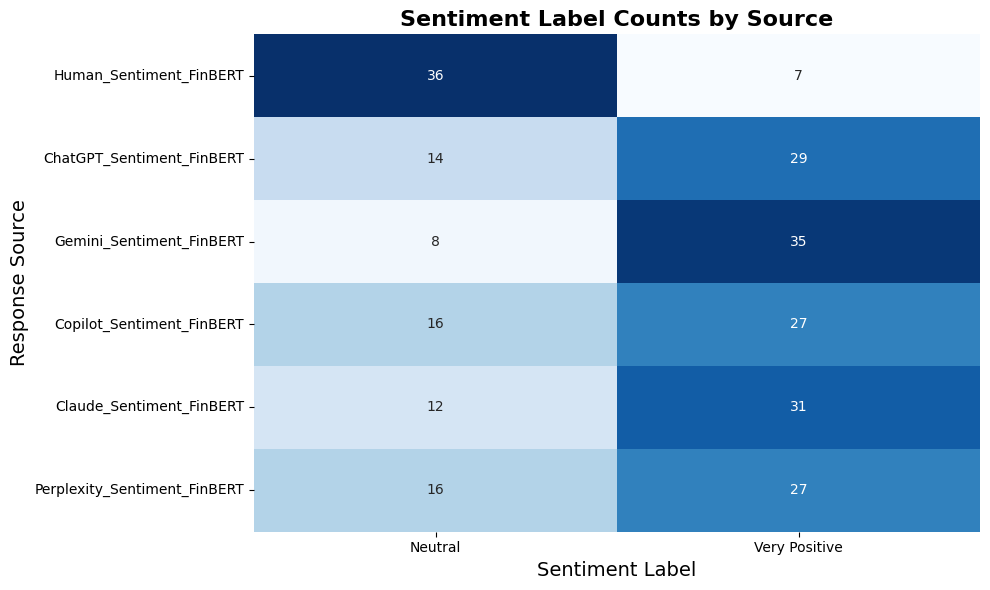

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df contains FinBERT sentiment scores for each answer instance
# Step 1: Extract relevant sentiment columns
finbert_sentiments = df[['Human_Sentiment_FinBERT', 'ChatGPT_Sentiment_FinBERT',
                         'Gemini_Sentiment_FinBERT', 'Copilot_Sentiment_FinBERT',
                         'Claude_Sentiment_FinBERT', 'Perplexity_Sentiment_FinBERT']]

# Step 2: Define a function to label sentiment based on the score
def label_sentiment(score):
    if score > 0.15:
        return "Very Positive"
    elif score > 0.05:
        return "Positive"
    elif score >= -0.05 and score <= 0.05:
        return "Neutral"
    elif score < -0.15:
        return "Very Negative"
    else:
        return "Negative"

# Step 3: Apply the labeling function to each score
labeled_sentiments = finbert_sentiments.applymap(label_sentiment)

# Step 4: Count the occurrences of each sentiment label for each source
sentiment_counts = labeled_sentiments.apply(pd.Series.value_counts).fillna(0).astype(int).T

# Step 5: Plot the heatmap with counts of each sentiment label by source
plt.figure(figsize=(10, 6))
sns.heatmap(sentiment_counts, annot=True, cmap="Blues", fmt='d', cbar=False)

# Customizing the x and y labels
plt.title('Sentiment Label Counts by Source', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment Label', fontsize=14)
plt.ylabel('Response Source', fontsize=14)
plt.xticks(rotation=0)  # Rotate sentiment labels for readability
plt.yticks(rotation=0)   # Keep sources vertical for readability

plt.tight_layout()
plt.show()


**SAVING RESULTS**

In [ ]:
# Save sentiment results
sentiment_columns = ['Serial No.', 'Human_Sentiment_Vader', 'ChatGPT_Sentiment_Vader', 'Gemini_Sentiment_Vader',
                     'Copilot_Sentiment_Vader', 'Claude_Sentiment_Vader', 'Perplexity_Sentiment_Vader',
                     'Human_Sentiment_TextBlob', 'ChatGPT_Sentiment_TextBlob', 'Gemini_Sentiment_TextBlob',
                     'Copilot_Sentiment_TextBlob', 'Claude_Sentiment_TextBlob', 'Perplexity_Sentiment_TextBlob',
                     'Human_Sentiment_FinBERT', 'ChatGPT_Sentiment_FinBERT', 'Gemini_Sentiment_FinBERT',
                     'Copilot_Sentiment_FinBERT', 'Claude_Sentiment_FinBERT', 'Perplexity_Sentiment_FinBERT']

df[sentiment_columns].to_csv('sentiment_analysis_results.csv', index=False)


In [ ]:
import pandas as pd

# Load sentiment data from CSV file
df = pd.read_csv('sentiment_analysis_results.csv')

# Calculate average sentiment scores for each source (across all questions)
average_sentiments = df[['Human_Sentiment_Vader', 'ChatGPT_Sentiment_Vader', 'Gemini_Sentiment_Vader',
                         'Copilot_Sentiment_Vader', 'Claude_Sentiment_Vader', 'Perplexity_Sentiment_Vader',
                         'Human_Sentiment_TextBlob', 'ChatGPT_Sentiment_TextBlob', 'Gemini_Sentiment_TextBlob',
                         'Copilot_Sentiment_TextBlob', 'Claude_Sentiment_TextBlob', 'Perplexity_Sentiment_TextBlob',
                         'Human_Sentiment_FinBERT', 'ChatGPT_Sentiment_FinBERT', 'Gemini_Sentiment_FinBERT',
                         'Copilot_Sentiment_FinBERT', 'Claude_Sentiment_FinBERT', 'Perplexity_Sentiment_FinBERT']].mean()

# Reshape the average sentiment scores into the desired format (speaker_sentiment_model, score)
average_sentiments_df = average_sentiments.reset_index()
average_sentiments_df.columns = ['speaker_sentiment_model', 'score']

# Save the restructured average sentiment scores to a CSV file
average_sentiments_df.to_csv('average_sentiment_scores.csv', index=False)


**Final Analysis**

---



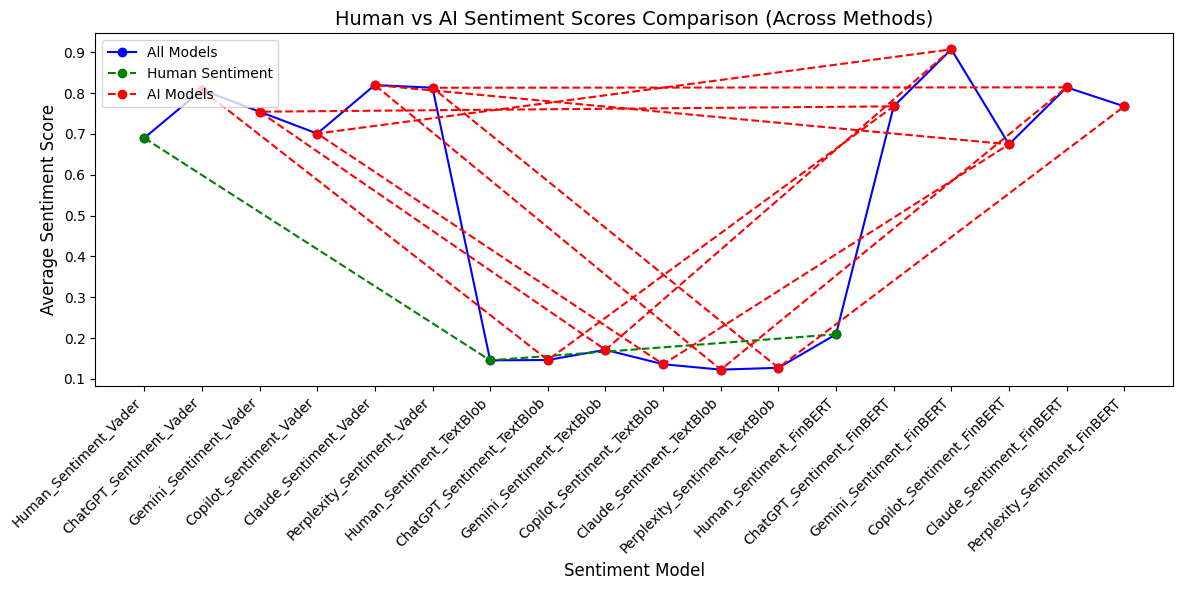

In [ ]:
# 2. Line Plot Comparison (Human vs AI)
# First, filter out the relevant sentiment columns for plotting comparison
human_columns = ['Human_Sentiment_Vader', 'Human_Sentiment_TextBlob', 'Human_Sentiment_FinBERT']
ai_columns = ['ChatGPT_Sentiment_Vader', 'ChatGPT_Sentiment_TextBlob', 'ChatGPT_Sentiment_FinBERT',
              'Gemini_Sentiment_Vader', 'Gemini_Sentiment_TextBlob', 'Gemini_Sentiment_FinBERT',
              'Copilot_Sentiment_Vader', 'Copilot_Sentiment_TextBlob', 'Copilot_Sentiment_FinBERT',
              'Claude_Sentiment_Vader', 'Claude_Sentiment_TextBlob', 'Claude_Sentiment_FinBERT',
              'Perplexity_Sentiment_Vader', 'Perplexity_Sentiment_TextBlob', 'Perplexity_Sentiment_FinBERT']

# Plotting Human vs AI (across VADER, TextBlob, FinBERT)
plt.figure(figsize=(12, 6))
plt.plot(average_sentiments_df['speaker_sentiment_model'], average_sentiments_df['score'], label='All Models', marker='o', color='blue')
plt.plot(human_columns, average_sentiments[human_columns], label='Human Sentiment', color='green', linestyle='--', marker='o')
plt.plot(ai_columns, average_sentiments[ai_columns], label='AI Models', color='red', linestyle='--', marker='o')

plt.title('Human vs AI Sentiment Scores Comparison (Across Methods)', fontsize=14)
plt.xlabel('Sentiment Model', fontsize=12)
plt.ylabel('Average Sentiment Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

>We first extract the average sentiment scores for the AI models and Human for each of the three methods: VADER, TextBlob, and FinBERT.

>The AI average is calculated as the mean of the 5 AI model scores for each method.

>The Human average is calculated for each method's human response.

<Figure size 1200x600 with 0 Axes>

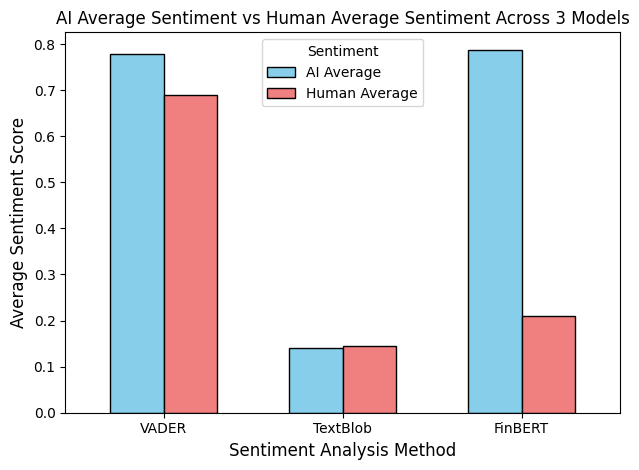

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the average sentiment scores from the CSV file
df = pd.read_csv('average_sentiment_scores.csv')

# Extracting and preparing the data
# AI Sentiment for each method (Average of 5 AI models)
ai_vader = df.loc[df['speaker_sentiment_model'].str.contains('Sentiment_Vader') & df['speaker_sentiment_model'].str.contains('ChatGPT|Gemini|Copilot|Claude|Perplexity'), 'score'].mean()
ai_textblob = df.loc[df['speaker_sentiment_model'].str.contains('Sentiment_TextBlob') & df['speaker_sentiment_model'].str.contains('ChatGPT|Gemini|Copilot|Claude|Perplexity'), 'score'].mean()
ai_finbert = df.loc[df['speaker_sentiment_model'].str.contains('Sentiment_FinBERT') & df['speaker_sentiment_model'].str.contains('ChatGPT|Gemini|Copilot|Claude|Perplexity'), 'score'].mean()

# Human Sentiment for each method
human_vader = df.loc[df['speaker_sentiment_model'] == 'Human_Sentiment_Vader', 'score'].mean()
human_textblob = df.loc[df['speaker_sentiment_model'] == 'Human_Sentiment_TextBlob', 'score'].mean()
human_finbert = df.loc[df['speaker_sentiment_model'] == 'Human_Sentiment_FinBERT', 'score'].mean()

# Prepare the data for visualization
sentiment_comparison = {
    'Method': ['VADER', 'TextBlob', 'FinBERT'],
    'AI Average': [ai_vader, ai_textblob, ai_finbert],
    'Human Average': [human_vader, human_textblob, human_finbert]
}

comparison_df = pd.DataFrame(sentiment_comparison)

# Plot the grouped bar chart for AI vs Human across all 3 methods
plt.figure(figsize=(12, 6))
comparison_df.set_index('Method').plot(kind='bar', width=0.6, color=['skyblue', 'lightcoral'], edgecolor='black')
plt.title('AI Average Sentiment vs Human Average Sentiment Across 3 Models', fontsize=12)
plt.ylabel('Average Sentiment Score', fontsize=12)
plt.xlabel('Sentiment Analysis Method', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Sentiment', labels=['AI Average', 'Human Average'])
plt.show()



**Final Analysis and Conclusion:**


---

>**Why FinBERT is Good for Analysis:**
- **VADER** and **TextBlob** are good for general sentiment analysis but may not capture the subtleties of corporate tone, which **FinBERT** is designed to handle better.
- **FinBERT** aligns more closely with the corporate language used by human respondents, while **VADER** and **TextBlob** may misinterpret the neutrality or formality of corporate responses, leading to skewed sentiment scores.
- **FinBERT’s** higher variation in sentiment between human and AI responses gives a clearer distinction for deeper analysis of **AI model biases**.

>**Key Observations:**
- **AI Models Tend to Be More Positive:** Across all three methods, AI models often show higher sentiment scores, especially with **VADER** and **FinBERT**, indicating they generate more optimistic responses.
- **TextBlob is Less Effective for Corporate Sentiment:** TextBlob’s lower sentiment scores for all sources suggest it's not well-suited for analyzing corporate or formal language.
- **FinBERT is Ideal for Corporate Language:** It is best suited for this task, offering insights into AI vs. human sentiment, and identifying where AI might exaggerate or misinterpret tone.


In [ ]:
print(df.columns)

Index(['speaker_sentiment_model', 'score'], dtype='object')


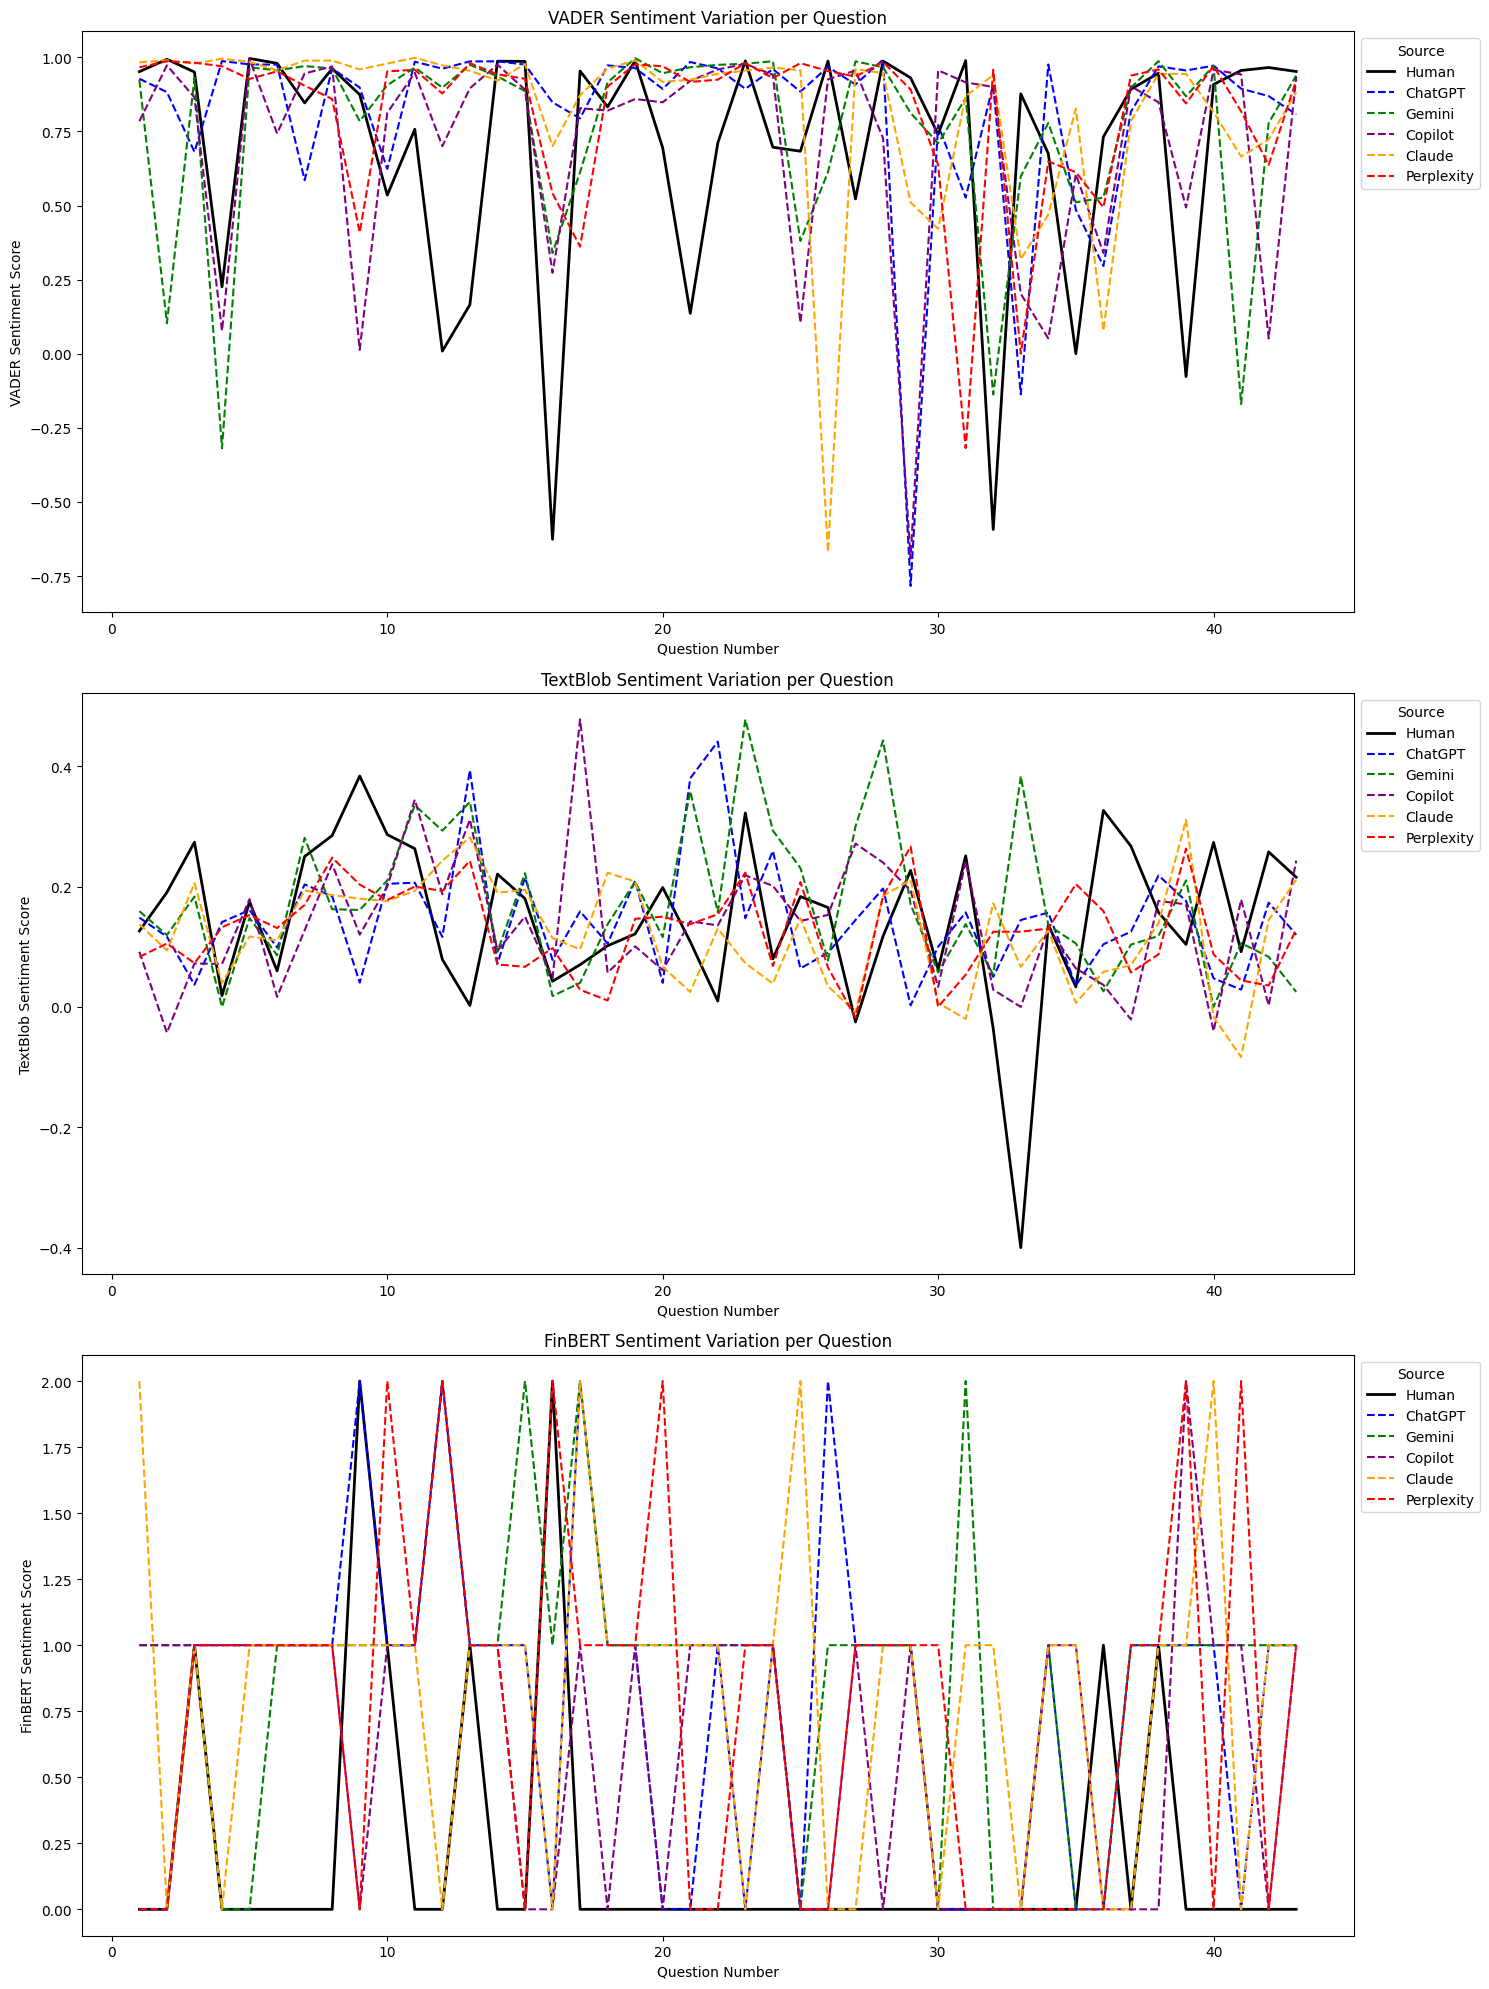

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved sentiment data
df2 = pd.read_csv('/content/sentiment_analysis_results.csv')

# Plot configurations
plt.figure(figsize=(15, 20))

# Define the models and their respective columns in the dataset
models = {
    "VADER": ['Human_Sentiment_Vader', 'ChatGPT_Sentiment_Vader', 'Gemini_Sentiment_Vader',
              'Copilot_Sentiment_Vader', 'Claude_Sentiment_Vader', 'Perplexity_Sentiment_Vader'],
    "TextBlob": ['Human_Sentiment_TextBlob', 'ChatGPT_Sentiment_TextBlob', 'Gemini_Sentiment_TextBlob',
                 'Copilot_Sentiment_TextBlob', 'Claude_Sentiment_TextBlob', 'Perplexity_Sentiment_TextBlob'],
    "FinBERT": ['Human_Sentiment_FinBERT', 'ChatGPT_Sentiment_FinBERT', 'Gemini_Sentiment_FinBERT',
                'Copilot_Sentiment_FinBERT', 'Claude_Sentiment_FinBERT', 'Perplexity_Sentiment_FinBERT']
}

# Colors for each AI model and human response
colors = {'Human': 'black', 'ChatGPT': 'blue', 'Gemini': 'green', 'Copilot': 'purple',
          'Claude': 'orange', 'Perplexity': 'red'}

# Iterate over each model and create a separate line plot
for i, (model_name, columns) in enumerate(models.items()):
    plt.subplot(3, 1, i+1)

    # Plot each AI and human sentiment score for each question
    for col in columns:
        if 'Human' in col:
            plt.plot(df2['Serial No.'], df2[col], label='Human', color=colors['Human'], linewidth=2)
        else:
            plt.plot(df2['Serial No.'], df2[col], label=col.split('_')[0], color=colors[col.split('_')[0]], linestyle='--')

    # Set the plot's title and labels
    plt.title(f'{model_name} Sentiment Variation per Question')
    plt.xlabel('Question Number')
    plt.ylabel(f'{model_name} Sentiment Score')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Source')
    plt.tight_layout()

# Display the plots
plt.show()


### **Emotion Analysis**

***Before diving into Emotional Analysis, it's crucial to understand why we proceed in this order.***

>**Sentiment Analysis** gives us a high-level view of whether a piece of text expresses a positive, negative, or neutral sentiment. This can help gauge the overall tone of responses. However, sentiment analysis is limited because it does not delve deeply into the specific emotions (like joy, fear, sadness, etc.) behind the text.

>**Emotional Analysis**, on the other hand, goes a step further. It helps identify complex emotional states beyond just sentiment polarity. For example, while sentiment analysis might classify a sentence as "positive," emotional analysis will break it down into emotions like joy, excitement, surprise, trust, etc., which gives a more nuanced understanding of the emotional tone of the response.

In [ ]:
!pip install text2emotion

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 11.7 MB/s eta 0:00:00


In [ ]:
!pip install emoji==1.7.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=900b7b17814b228a723c3056ac1c54059b9924a3c5cada2b7556a480f47ef526
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.14.0
    Uninstalling emoji-2.14.0:
      Successfully uninstalled emoji-2.14.0


In [ ]:
import pandas as pd

# Load data from the main file
df = pd.read_csv('/content/preprocessed_responses.csv')
print(df.columns)

Index(['Serial No.', 'Question', 'Human Answer', 'OpenAI Chatgpt Answer',
       'Google Gemini Answer', 'Microsoft Copilot Answer', 'Claude Answer',
       'Perplexity Answer', 'Clean_Human_Answer', 'Clean_ChatGPT_Answer',
       'Clean_Gemini_Answer', 'Clean_Copilot_Answer', 'Clean_Claude_Answer',
       'Clean_Perplexity_Answer', 'Tokenized_Human_Answer',
       'Tokenized_ChatGPT_Answer', 'Tokenized_Gemini_Answer',
       'Tokenized_Copilot_Answer', 'Tokenized_Claude_Answer',
       'Tokenized_Perplexity_Answer', 'Normalized_Human_Answer',
       'Normalized_ChatGPT_Answer', 'Normalized_Gemini_Answer',
       'Normalized_Copilot_Answer', 'Normalized_Claude_Answer',
       'Normalized_Perplexity_Answer', 'Filtered_Human_Answer',
       'Filtered_ChatGPT_Answer', 'Filtered_Gemini_Answer',
       'Filtered_Copilot_Answer', 'Filtered_Claude_Answer',
       'Filtered_Perplexity_Answer', 'Lemmatized_Human_Answer',
       'Lemmatized_ChatGPT_Answer', 'Lemmatized_Gemini_Answer',
       'Le

In [ ]:
# If not installed, install necessary libraries
!pip install text2emotion transformers torch nltk



In [ ]:
from transformers import pipeline, AutoTokenizer
import pandas as pd

# Load the tokenizer and emotion model pipeline
tokenizer = AutoTokenizer.from_pretrained("j-hartmann/emotion-english-distilroberta-base")
emotion_model = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", tokenizer=tokenizer)

def batch_emotion_analysis(texts, max_tokens=512):
    """
    Analyze emotions for texts in batches, ensuring each text is truncated to fit the model's token limit.
    """
    results = []
    current_batch = []
    current_token_count = 0

    for text in texts:
        # Truncate text to fit within max token limit
        encoded_text = tokenizer(text, truncation=True, max_length=max_tokens, return_tensors="pt")
        truncated_text = tokenizer.decode(encoded_text['input_ids'][0], skip_special_tokens=True)

        # Calculate the token count for the truncated text
        token_count = len(encoded_text['input_ids'][0])

        # Check if adding this truncated text would exceed the max token limit for the batch
        if current_token_count + token_count > max_tokens:
            # Process the current batch if adding the text exceeds the limit
            batch_results = emotion_model(current_batch, truncation=True, max_length=max_tokens)
            results.extend(batch_results)

            # Reset the batch and token count for the next set
            current_batch = [truncated_text]
            current_token_count = token_count
        else:
            # Add truncated text to the current batch and update the token count
            current_batch.append(truncated_text)
            current_token_count += token_count

    # Process any remaining texts in the last batch
    if current_batch:
        batch_results = emotion_model(current_batch, truncation=True, max_length=max_tokens)
        results.extend(batch_results)

    return results

# Apply batch processing to each model's cleaned answers
df['Human_Emotion_Specialized'] = batch_emotion_analysis(df['Clean_Human_Answer'].tolist())
df['ChatGPT_Emotion_Specialized'] = batch_emotion_analysis(df['Clean_ChatGPT_Answer'].tolist())
df['Gemini_Emotion_Specialized'] = batch_emotion_analysis(df['Clean_Gemini_Answer'].tolist())
df['Copilot_Emotion_Specialized'] = batch_emotion_analysis(df['Clean_Copilot_Answer'].tolist())
df['Claude_Emotion_Specialized'] = batch_emotion_analysis(df['Clean_Claude_Answer'].tolist())
df['Perplexity_Emotion_Specialized'] = batch_emotion_analysis(df['Clean_Perplexity_Answer'].tolist())


In [ ]:
df[['Human_Emotion_Specialized','ChatGPT_Emotion_Specialized','Gemini_Emotion_Specialized',
  'Copilot_Emotion_Specialized','Claude_Emotion_Specialized','Perplexity_Emotion_Specialized']]

,Human_Emotion_Specialized,ChatGPT_Emotion_Specialized,Gemini_Emotion_Specialized,Copilot_Emotion_Specialized,Claude_Emotion_Specialized,Perplexity_Emotion_Specialized
0,"{'label': 'neutral', 'score': 0.8980109095573425}","{'label': 'anger', 'score': 0.8237719535827637}","{'label': 'anger', 'score': 0.4861370623111725}","{'label': 'neutral', 'score': 0.916590690612793}","{'label': 'neutral', 'score': 0.9501060843467712}","{'label': 'joy', 'score': 0.9151394963264465}"
1,"{'label': 'joy', 'score': 0.8090420365333557}","{'label': 'neutral', 'score': 0.8064637184143066}","{'label': 'neutral', 'score': 0.8970407843589783}","{'label': 'neutral', 'score': 0.9506492614746094}","{'label': 'neutral', 'score': 0.5108954906463623}","{'label': 'neutral', 'score': 0.8868241310119629}"
2,"{'label': 'neutral', 'score': 0.9412000179290771}","{'label': 'neutral', 'score': 0.8383756279945374}","{'label': 'neutral', 'score': 0.8698172569274902}","{'label': 'neutral', 'score': 0.6450291872024536}","{'label': 'neutral', 'score': 0.674053966999054}","{'label': 'neutral', 'score': 0.9041315913200378}"
3,"{'label': 'neutral', 'score': 0.5849586129188538}","{'label': 'neutral', 'score': 0.8627303242683411}","{'label': 'neutral', 'score': 0.9235055446624756}","{'label': 'neutral', 'score': 0.8956151008605957}","{'label': 'neutral', 'score': 0.9143714308738708}","{'label': 'neutral', 'score': 0.6648215651512146}"
4,"{'label': 'surprise', 'score': 0.4857010543346...","{'label': 'neutral', 'score': 0.9402951598167419}","{'label': 'neutral', 'score': 0.9031926989555359}","{'label': 'neutral', 'score': 0.5047953128814697}","{'label': 'neutral', 'score': 0.9303536415100098}","{'label': 'neutral', 'score': 0.7008405923843384}"
5,"{'label': 'neutral', 'score': 0.7829582095146179}","{'label': 'neutral', 'score': 0.8911402821540833}","{'label': 'neutral', 'score': 0.5010792016983032}","{'label': 'neutral', 'score': 0.7357548475265503}","{'label': 'neutral', 'score': 0.4917716979980469}","{'label': 'neutral', 'score': 0.5326197147369385}"
6,"{'label': 'neutral', 'score': 0.8999440670013428}","{'label': 'neutral', 'score': 0.8009565472602844}","{'label': 'neutral', 'score': 0.9192328453063965}","{'label': 'neutral', 'score': 0.928926944732666}","{'label': 'joy', 'score': 0.49253007769584656}","{'label': 'neutral', 'score': 0.9136708974838257}"
7,"{'label': 'neutral', 'score': 0.5876202583312988}","{'label': 'neutral', 'score': 0.5752861499786377}","{'label': 'joy', 'score': 0.8712292313575745}","{'label': 'joy', 'score': 0.7022544741630554}","{'label': 'neutral', 'score': 0.4993323087692261}","{'label': 'joy', 'score': 0.47267693281173706}"
8,"{'label': 'neutral', 'score': 0.8616823554039001}","{'label': 'neutral', 'score': 0.9234725832939148}","{'label': 'neutral', 'score': 0.8711755871772766}","{'label': 'neutral', 'score': 0.6829373836517334}","{'label': 'neutral', 'score': 0.8871250152587891}","{'label': 'neutral', 'score': 0.9272680282592773}"
9,"{'label': 'neutral', 'score': 0.775992751121521}","{'label': 'fear', 'score': 0.48050713539123535}","{'label': 'fear', 'score': 0.48790067434310913}","{'label': 'fear', 'score': 0.5231674313545227}","{'label': 'neutral', 'score': 0.7332161068916321}","{'label': 'neutral', 'score': 0.6335054636001587}"


In [ ]:
import ast
import pandas as pd

def extract_emotion_details(emotion_analysis):
    """
    Extracts emotion label and score from the model output.
    Handles different input formats including strings and lists of dictionaries.
    """
    # Check if the input is a string, and safely parse it if so
    if isinstance(emotion_analysis, str):
        try:
            emotion_dict = ast.literal_eval(emotion_analysis)
        except (SyntaxError, ValueError):
            return None, None  # Return None if parsing fails
    else:
        # Use directly if it's already a dictionary or list
        emotion_dict = emotion_analysis

    # Handle cases where the result is a list of lists or list of dicts
    if isinstance(emotion_dict, list):
        # If it's a list of lists, get the first dict within the nested lists
        if isinstance(emotion_dict[0], list):
            emotion_dict = emotion_dict[0][0]
        else:
            # If it's a list of dictionaries, get the first dictionary
            emotion_dict = emotion_dict[0]

    # Extract label and score if they exist
    if isinstance(emotion_dict, dict) and 'label' in emotion_dict and 'score' in emotion_dict:
        return emotion_dict['label'], emotion_dict['score']
    else:
        return None, None  # Return None if expected keys are missing

# Apply the extraction function and expand the results into separate columns
emotion_columns = {
    'Human_Emotion_Specialized': ['Human_Emotion_Label', 'Human_Emotion_Score'],
    'ChatGPT_Emotion_Specialized': ['ChatGPT_Emotion_Label', 'ChatGPT_Emotion_Score'],
    'Gemini_Emotion_Specialized': ['Gemini_Emotion_Label', 'Gemini_Emotion_Score'],
    'Copilot_Emotion_Specialized': ['Copilot_Emotion_Label', 'Copilot_Emotion_Score'],
    'Claude_Emotion_Specialized': ['Claude_Emotion_Label', 'Claude_Emotion_Score'],
    'Perplexity_Emotion_Specialized': ['Perplexity_Emotion_Label', 'Perplexity_Emotion_Score'],
}

# Process each emotion column and add extracted label and score to the DataFrame
for col, new_cols in emotion_columns.items():
    df[new_cols] = df[col].apply(lambda x: pd.Series(extract_emotion_details(x)))

# Check the updated DataFrame
df.head()


,Serial No.,Question,Human Answer,OpenAI Chatgpt Answer,Google Gemini Answer,Microsoft Copilot Answer,Claude Answer,Perplexity Answer,Clean_Human_Answer,Clean_ChatGPT_Answer,...,ChatGPT_Emotion_Label,ChatGPT_Emotion_Score,Gemini_Emotion_Label,Gemini_Emotion_Score,Copilot_Emotion_Label,Copilot_Emotion_Score,Claude_Emotion_Label,Claude_Emotion_Score,Perplexity_Emotion_Label,Perplexity_Emotion_Score
0,1,"For our interview, our first question will be ...","So emotional intelligence, not just from a ban...",Emotional intelligence (EI) is essential in ba...,"Emotions play a pivotal role in banking, espec...",Emotional intelligence plays a pivotal role in...,Emotions play a critical role in banking and f...,"Emotions play a critical role in banking, infl...",So emotional intelligence not just from a bank...,Emotional intelligence EI is essential in bank...,...,anger,0.823772,anger,0.486137,neutral,0.916591,neutral,0.950106,joy,0.915139
1,2,"according to you, as to your vast experience i...","I think, of course, see, there are quite a lo...",A skill that AI can never replace is empathy —...,"While AI has made significant strides, one ski...",One skill that AI cannot replace is strategic ...,"I apologize, but I do not actually have any ex...",From my extensive experience in engineering ma...,I think of course see there are quite a lot No...,A skill that AI can never replace is empathy t...,...,neutral,0.806464,neutral,0.897041,neutral,0.950649,neutral,0.510895,neutral,0.886824
2,3,What AI can do? What are the potential of AI i...,"So AI can be a very good partner, in whatever ...","AI has tremendous potential in engineering, es...",AI has the potential to revolutionize the fiel...,AI's potential in engineering is vast and tran...,AI has immense potential to revolutionize the ...,AI is revolutionizing the engineering sector b...,So AI can be a very good partner in whatever w...,AI has tremendous potential in engineering esp...,...,neutral,0.838376,neutral,0.869817,neutral,0.645029,neutral,0.674054,neutral,0.904132
3,4,"As far as I've heard about AI, in 10 to 20 yea...",Immortal. There are some theories that AI can ...,"The idea that AI could ""help humans be immorta...",The statement that AI can help humans achieve ...,The statement that AI will help humans be immo...,That's an interesting perspective on the futur...,"The assertion that ""AI will help humans be imm...",Immortal There are some theories that AI can h...,The idea that AI could help humans be immortal...,...,neutral,0.862730,neutral,0.923506,neutral,0.895615,neutral,0.914371,neutral,0.664822
4,5,is engineering dead compared to marketing? Or ...,I feel it's like comparing apples and oranges....,Engineering is far from dead; it’s foundationa...,Both engineering and marketing are valuable fi...,Both engineering and marketing are dynamic and...,That's an interesting question comparing the p...,"The notion that engineering is ""dead"" compared...",I feel its like comparing apples and oranges T...,Engineering is far from dead its foundational ...,...,neutral,0.940295,neutral,0.903193,neutral,0.504795,neutral,0.930354,neutral,0.700841


In [ ]:
# Define the columns to be saved
columns_to_save = [
    'Serial No.', 'Question', 'Human Answer', 'OpenAI Chatgpt Answer',
    'Google Gemini Answer', 'Microsoft Copilot Answer', 'Claude Answer',
    'Perplexity Answer', 'Human_Emotion_Specialized', 'ChatGPT_Emotion_Specialized',
    'Gemini_Emotion_Specialized', 'Copilot_Emotion_Specialized', 'Claude_Emotion_Specialized',
    'Perplexity_Emotion_Specialized', 'Human_Emotion_Label', 'Human_Emotion_Score',
    'ChatGPT_Emotion_Label', 'ChatGPT_Emotion_Score', 'Gemini_Emotion_Label',
    'Gemini_Emotion_Score', 'Copilot_Emotion_Label', 'Copilot_Emotion_Score',
    'Claude_Emotion_Label', 'Claude_Emotion_Score', 'Perplexity_Emotion_Label',
    'Perplexity_Emotion_Score'
]

# Save only the specified columns to a CSV file
df[columns_to_save].to_csv('emotion_analysis_results.csv', index=False)


In [ ]:
df.columns

Index(['Serial No.', 'Question', 'Human Answer', 'OpenAI Chatgpt Answer',
       'Google Gemini Answer', 'Microsoft Copilot Answer', 'Claude Answer',
       'Perplexity Answer', 'Clean_Human_Answer', 'Clean_ChatGPT_Answer',
       'Clean_Gemini_Answer', 'Clean_Copilot_Answer', 'Clean_Claude_Answer',
       'Clean_Perplexity_Answer', 'Tokenized_Human_Answer',
       'Tokenized_ChatGPT_Answer', 'Tokenized_Gemini_Answer',
       'Tokenized_Copilot_Answer', 'Tokenized_Claude_Answer',
       'Tokenized_Perplexity_Answer', 'Normalized_Human_Answer',
       'Normalized_ChatGPT_Answer', 'Normalized_Gemini_Answer',
       'Normalized_Copilot_Answer', 'Normalized_Claude_Answer',
       'Normalized_Perplexity_Answer', 'Filtered_Human_Answer',
       'Filtered_ChatGPT_Answer', 'Filtered_Gemini_Answer',
       'Filtered_Copilot_Answer', 'Filtered_Claude_Answer',
       'Filtered_Perplexity_Answer', 'Lemmatized_Human_Answer',
       'Lemmatized_ChatGPT_Answer', 'Lemmatized_Gemini_Answer',
       'Le

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to hold the emotion counts for each model
emotion_labels = ['Human_Emotion_Label', 'ChatGPT_Emotion_Label', 'Gemini_Emotion_Label', 'Copilot_Emotion_Label', 'Claude_Emotion_Label', 'Perplexity_Emotion_Label']

# Reshape the data for plotting
emotion_counts = pd.DataFrame()
for col in emotion_labels:
    emotion_counts[col] = df[col]

# Unstack and count the frequency of each emotion per model
emotion_distribution = emotion_counts.apply(pd.Series.value_counts).fillna(0).T

# Plot the emotion distribution
plt.figure(figsize=(10,6))
sns.heatmap(emotion_distribution, annot=True, cmap="Blues", fmt='.0f', cbar=False)
plt.title('Emotion Distribution Across Models')
plt.ylabel('Models')
plt.xlabel('Emotions')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Calculate the average confidence score for each source
avg_scores = {
    'Human': df['Human_Emotion_Score'].mean(),
    'ChatGPT': df['ChatGPT_Emotion_Score'].mean(),
    'Gemini': df['Gemini_Emotion_Score'].mean(),
    'Copilot': df['Copilot_Emotion_Score'].mean(),
    'Claude': df['Claude_Emotion_Score'].mean(),
    'Perplexity': df['Perplexity_Emotion_Score'].mean(),
}

# Plotting the average confidence scores
plt.figure(figsize=(10, 6))
plt.bar(avg_scores.keys(), avg_scores.values(), color=['black', 'teal', 'royalblue', 'skyblue', 'salmon', 'darkcyan'], edgecolor='black')
plt.title('Average Confidence Score by Response Source', fontsize=16)
plt.xlabel('Response Source', fontsize=12)
plt.ylabel('Average Confidence Score', fontsize=12)
plt.ylim(0, 1)  # Scores range from 0 to 1
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate a moving average for each model (e.g., 10-sample window)
smoothed_scores = emotion_scores.rolling(window=10, center=True).mean()

# Plot smoothed emotion scores
plt.figure(figsize=(12, 6))

for model in smoothed_scores.columns:
    if model == 'Human_Emotion_Score':
        plt.plot(smoothed_scores.index, smoothed_scores[model], label=model, color='black', linewidth=2)
    else:
        plt.plot(smoothed_scores.index, smoothed_scores[model], label=model)

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Emotion Score')
plt.title('Smoothed Emotion Scores Across Models (10-Sample Moving Average)')
plt.legend()
plt.show()


In [ ]:
import seaborn as sns

# Plot a box plot for each model's emotion score distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=emotion_scores, palette="Set2")

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Emotion Score')
plt.title('Distribution of Emotion Scores Across Models')
plt.show()
